# Classification

In this notebook, I'll provide workflows for doing classification using the "Iris" dataset. 

In [4]:
# Load libraries

# General DS Libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

# Pre-processing and Scoring
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, f1_score

# Pre-processing and Scoring
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, train_test_split

# Set up to use Latex
matplotlib.rcParams['text.usetex'] = True
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

Here's the Iris dataset, loaded and with some info

In [5]:
# Load Iris dataset and print out info
iris = sns.load_dataset('iris')
print(iris.info())
print(iris.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


## Part 1: Some Simple Binary Classification

Making a binary classification model, I can use lots of different strategies:

* Logistic Regression
* Naive Bayes
* K-Nearest Neighbors
* Simple Decision Tree
* Random Forest
* Gradient Boosting

First, I'll just split up the data, using just virginica/versicolor:

In [6]:
# Remove Setosa
iris_binary = iris[iris.species != 'setosa']

# Split X and Y
X = iris_binary.drop(['species'], axis = 1, inplace=False)
Y = iris_binary['species']

# Split to train/test (80/20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 12)

Now I'll make a predictAndROC function to make a prediction and make a ROC curve as well

In [38]:
def predictAndRoc(model, X_test, Y_test, plot_flag = True):
    
    '''Given a fit binary classification model and test data, predict and plot in comparison to actual'''
    
    # Convert Y_test to a numeric
    Y_test = Y_test == 'virginica'
    
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # Compute actual predictions too
    y_pred = model.predict(X_test)

    # Calculate the AUC
    auc_score = roc_auc_score(Y_test, y_pred_prob)

    # Plot ROC curve if plot flag
    if plot_flag:        
        # Generate ROC curve values: fpr, tpr, thresholds
        fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.plot(fpr, tpr)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.text(x = 0.75, y = 0.05, s = "AUC = {:0.3f}".format(auc_score))
        plt.show()
    
    return y_pred

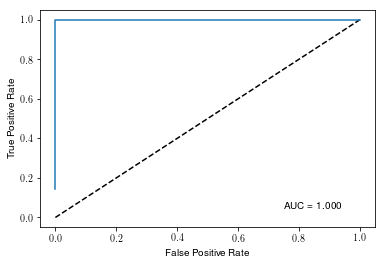

In [35]:
_ = predictAndRoc(lr, X_test, Y_test, plot_flag= True)

Now I'll run that on a handful of different models, starting with a logistic regression and going through the rest. I'll just run all using list comprehensions:

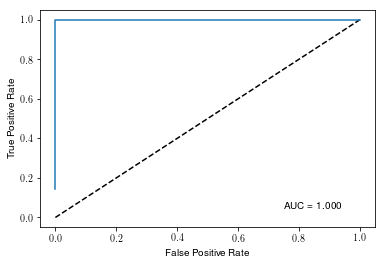

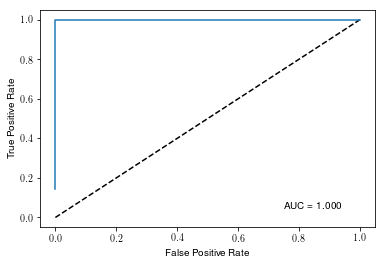

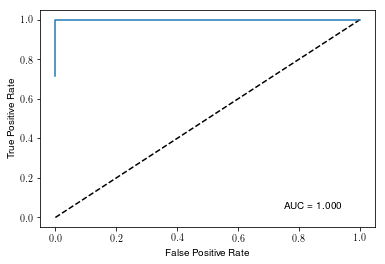

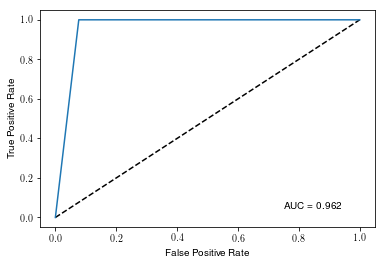

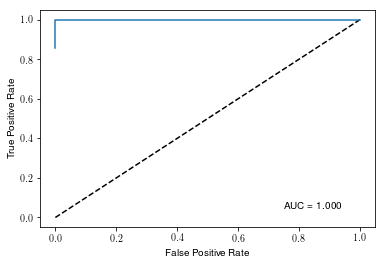

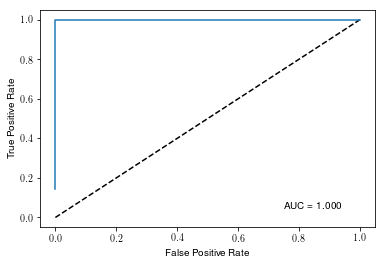

1.0
1.0
1.0
0.933333333333
1.0
0.933333333333


In [43]:
# Create all classifiers
lr = LogisticRegression()
nb = GaussianNB()
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

# Put them in a list
all_classifiers = [lr, nb, kn, dt, rf, gb]

# Fit all using list comprehension
_ = [model.fit(X_train, Y_train == 'virginica') for model in all_classifiers]

# Do the ROC prediction for each
y_pred_all = [predictAndRoc(model, X_test, Y_test, True) for model in all_classifiers]

# Print all their F1 scores
_ = [print(f1_score(Y_test == 'virginica', y_pred)) for y_pred in y_pred_all]


As shown, ALL of the models do really well because this is a pretty easy prediction task. The decision tree isn't perfect and the gradient boosted model isn't either. But in this case, I'd probably just use a logistic regression anyway. It's simple and understandable!

## Part 2: Multiclass Classification

This is trickier because I now have to deal with all 3 classes. I'll have to re-make my train and test sets, but that's easy enough. More difficult is visualization; I'll do this using a heat map of the confusion matrix instead. 

### 1: Logistic Regression

The issue here is that I have multiple classes; I'll get around that by using a OneVsRest approach:

In [ ]:
# Create the classifier object
lr = OneVsRestClassifier(LogisticRegression())

# 

## Part 3: Cross validating models

I'm just going to do this for the multiclass case; it should extend to binary easily enough. I'll use f1 score as the validation metric, as it compromises between precision and recall. 

In [ ]:
# Function for one model
def doCV(classifier, X, y): 
        
    # Create models
    cv_scores = cross_val_score(classifier, X, y, cv = 5,
                                 scoring = 'f1')
      
    # Return MAE
    return np.mean(cv_scores)